In [1]:
import datetime
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_excel("data_test.xlsx")

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'

In [10]:
df = pd.read_parquet('data.parquet')
df.drop(columns=['total_amount', 'tolls_amount'], inplace=True)
df.store_and_fwd_flag = (df.store_and_fwd_flag == 'Y').astype('int64')
df


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,improvement_surcharge,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,0,161,141,2,9.30,1.00,0.5,0.00,1.0,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,0,43,237,1,7.90,1.00,0.5,4.00,1.0,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,0,48,238,1,14.90,1.00,0.5,15.00,1.0,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,0,138,7,1,12.10,7.25,0.5,0.00,1.0,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,0,107,79,1,11.40,1.00,0.5,3.28,1.0,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,0,107,48,0,15.80,0.00,0.5,3.96,1.0,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,0,112,75,0,22.43,0.00,0.5,2.64,1.0,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,0,114,239,0,17.61,0.00,0.5,5.32,1.0,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,0,230,79,0,18.15,0.00,0.5,4.43,1.0,NaN,NaN


In [13]:
df.shape

(3066766, 17)

In [14]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'improvement_surcharge',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')

![...](columns_description.png)

In [15]:
def get_info_about_null_zero_unique(data):
    info = pd.DataFrame({
        'column': data.columns,
        'null': data.isna().sum().values,
        'zero': (data == .0).sum().values,
        'unique': [len(data[col].unique()) for col in data.columns],
    })

    info['% of null'] = info.null / data.shape[0] * 100
    info['% of zero'] = info.zero / data.shape[0] * 100
    info['% of unique'] = info.unique / data.shape[0] * 100
    info['dtype'] = data.dtypes.values

    return info

In [16]:
get_info_about_null_zero_unique(df)

,column,null,zero,unique,% of null,% of zero,% of unique,dtype
0,VendorID,0,0,2,0.00000,0.000000,0.000065,int64
1,tpep_pickup_datetime,0,0,1610975,0.00000,0.000000,52.530092,datetime64[ns]
2,tpep_dropoff_datetime,0,0,1611319,0.00000,0.000000,52.541309,datetime64[ns]
3,passenger_count,71743,51164,11,2.33937,1.668337,0.000359,float64
4,trip_distance,0,45862,4387,0.00000,1.495452,0.143050,float64
5,RatecodeID,71743,0,8,2.33937,0.000000,0.000261,float64
6,store_and_fwd_flag,0,3046763,2,0.00000,99.347749,0.000065,int64
7,PULocationID,0,0,257,0.00000,0.000000,0.008380,int64
8,DOLocationID,0,0,261,0.00000,0.000000,0.008511,int64
9,payment_type,0,71743,5,0.00000,2.339370,0.000163,int64


In [17]:
df.dropna(inplace=True)

In [19]:
df.describe()


,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,improvement_surcharge,congestion_surcharge,airport_fee
count,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06,2.995023e+06
mean,1.731985e+00,1.362532e+00,3.436199e+00,1.497440e+00,6.678747e-03,1.664399e+02,1.644651e+02,1.223096e+00,1.830827e+01,1.569120e+00,4.880263e-01,3.359193e+00,9.817241e-01,2.274231e+00,1.074086e-01
std,4.429253e-01,8.961200e-01,4.209135e+01,6.474767e+00,8.145025e-02,6.406785e+01,6.992720e+01,5.020600e-01,1.789325e+01,1.795131e+00,1.046392e-01,3.840552e+00,1.853866e-01,7.718454e-01,3.556511e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-9.622000e+01,-1.000000e+00,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.000000e+00,1.060000e+00,1.000000e+00,0.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.780000e+00,1.000000e+00,0.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.720000e+00,1.000000e+00,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.300000e+00,1.000000e+00,0.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.980000e+01,2.500000e+00,5.000000e-01,4.140000e+00,1.000000e+00,2.500000e+00,0.000000e+00
max,2.000000e+00,9.000000e+00,6.235952e+04,9.900000e+01,1.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,1.160100e+03,1.250000e+01,5.316000e+01,3.808000e+02,1.000000e+00,2.500000e+00,1.250000e+00


In [42]:
numeric_columns = [col for col in df.columns if df.dtypes[col] != object]

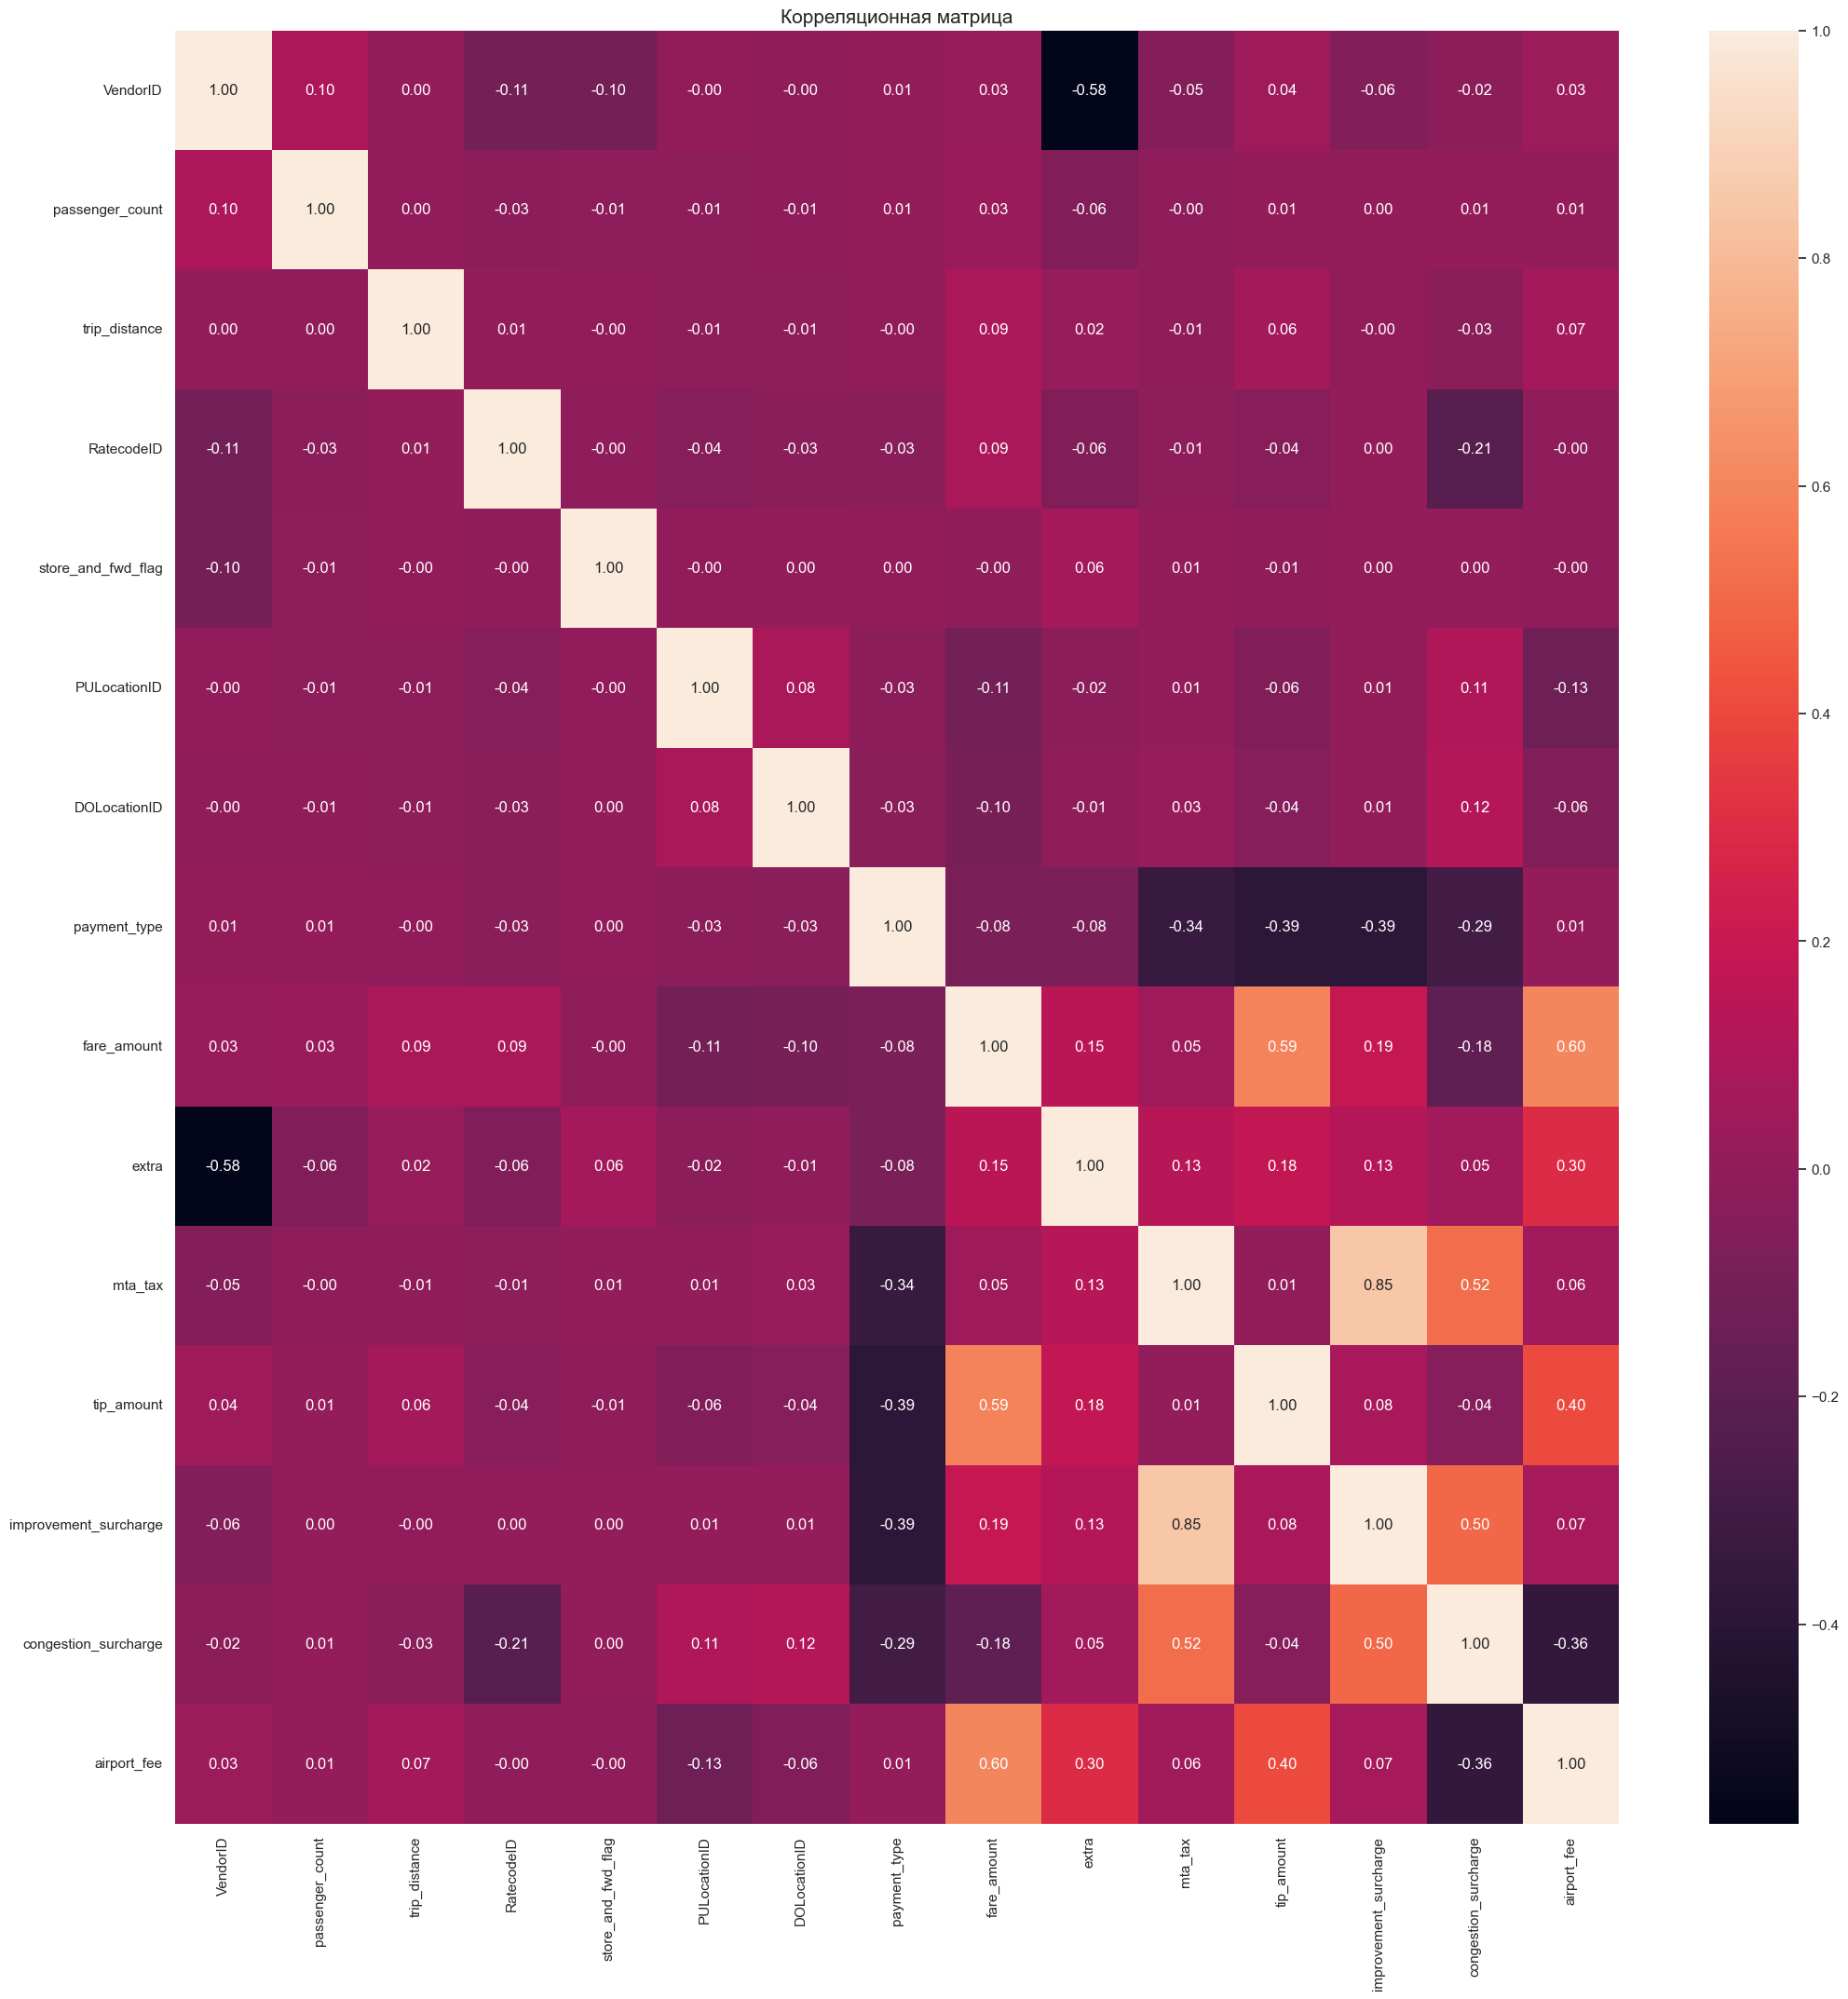

In [23]:
fig, ax = plt.subplots(figsize=(25, 25))
ax = sns.heatmap(data=df[numeric_columns].corr(), ax=ax, annot=True, fmt=".2f")
ax.set_title('Корреляционная матрица', fontsize=15);

In [43]:
categorical_columns = [
    'VendorID',
    'RatecodeID',
    'store_and_fwd_flag',
    'payment_type',
]
for i in categorical_columns:
    numeric_columns.remove(i)
numeric_columns.remove('tpep_pickup_datetime')
numeric_columns.remove('tpep_dropoff_datetime')


len(categorical_columns), len(numeric_columns)

(4, 11)

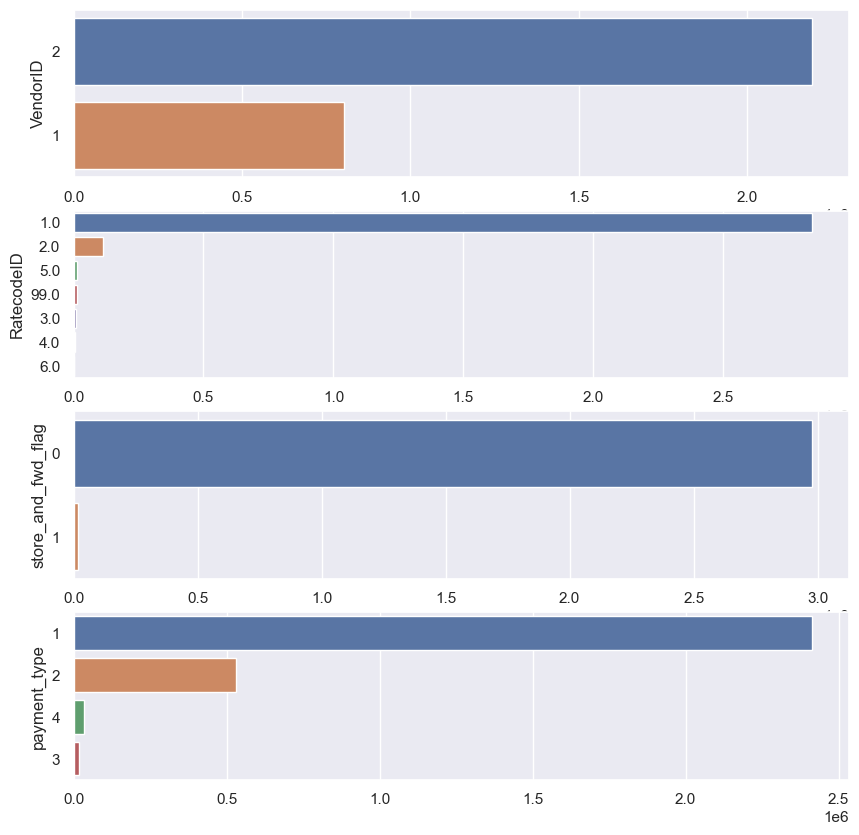

In [32]:
fig, axs = plt.subplots(len(categorical_columns), figsize=(10, 10))
for i in range(len(categorical_columns)):
    column = categorical_columns[i]
    sns.countplot(data=df, y=column, order=df[column].value_counts().index, ax=axs[i])
    axs[i].set(xlabel='')

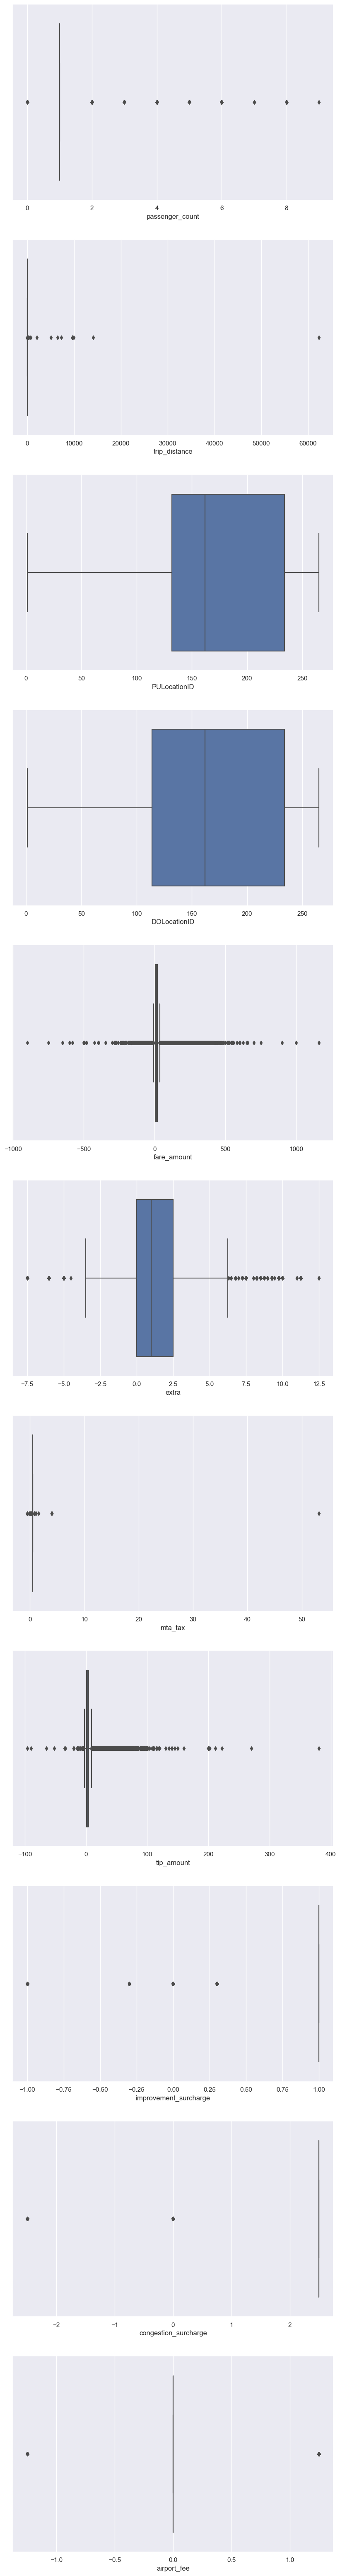

In [54]:
fig, axs = plt.subplots(len(numeric_columns), figsize=(10, 80))
for i in range(len(numeric_columns)):
    column = numeric_columns[i]
    sns.boxplot(x=df[column], ax=axs[i])
    # axs[i].set(title=column)

In [56]:
df.airport_fee.value_counts()

 0.00    2730456
 1.25     260960
-1.25       3607
Name: airport_fee, dtype: int64

In [57]:
df.congestion_surcharge.value_counts()

 2.5    2744268
 0.0     231037
-2.5      19718
Name: congestion_surcharge, dtype: int64

In [58]:
df.improvement_surcharge.value_counts()

 1.0    2963913
-1.0      25117
 0.3       5004
 0.0        953
-0.3         36
Name: improvement_surcharge, dtype: int64

In [59]:

for col in ['tip_amount', 'trip_distance', 'fare_amount', 'extra']:
    lower_bound = df[col].quantile(0.005)
    upper_bound = df[col].quantile(0.995)

    cond = (df[col] < lower_bound) | (df[col] > upper_bound)
    df.drop(df[cond].index, inplace=True)

<AxesSubplot:xlabel='tip_amount', ylabel='Count'>

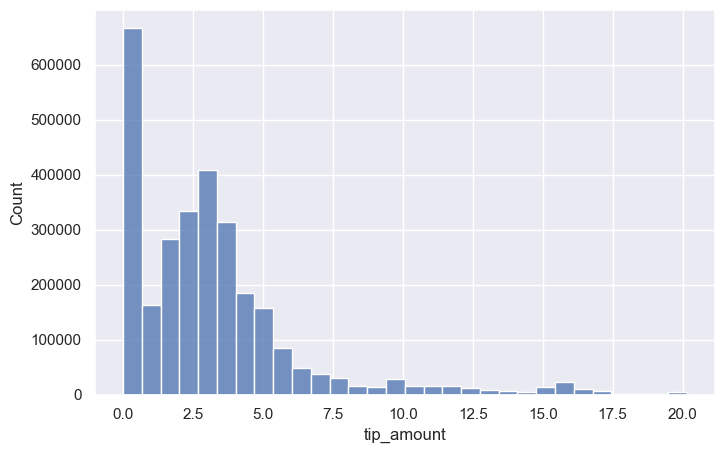

In [64]:
sns.histplot(df.tip_amount, bins=30)

<AxesSubplot:xlabel='tip_amount', ylabel='Count'>

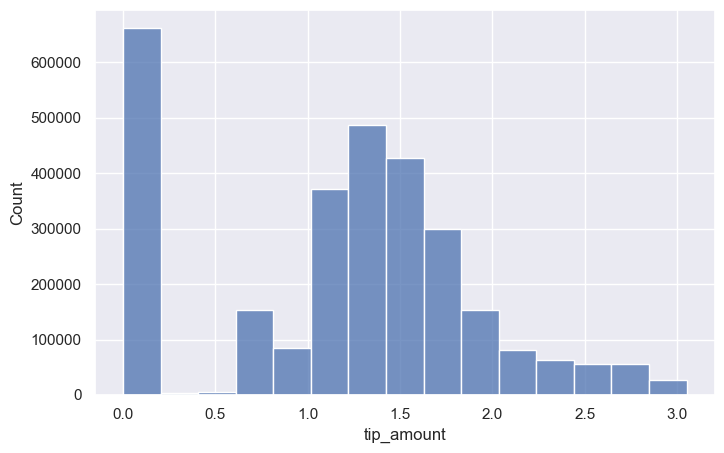

In [66]:
sns.histplot(np.log(df.tip_amount + 1), bins=15)